# **ML-8. Продвинутые методы машинного обучения**

# 1. Введение

→ В прошлом модуле мы научились важному этапу в разработке модели — поиску оптимальных гиперпараметров. Этот этап важен для получения лучшего качества модели. 

В этом модуле мы поговорим о способах ансамблирования и сбора в пайплайн как о дальнейшем шаге развёртывания модели. Дальнейшим этапом в освоении профессии дата-сайентиста станет погружение в тематику задач и основных методов решения задач **metric learning**.

## АНСАМБЛИРОВАНИЕ МОДЕЛЕЙ

При изучении Data Science идея ансамблирования впервые встречается при упоминании такой модели, как **случайный лес**. В данной модели обучаются базовые модели, представленные решающими деревьями,  предсказания которых впоследствии агрегируются некоторым образом, зависящим от задачи. В случае задачи регрессии берётся среднее либо средневзвешенное. В случае задачи классификации класс присваивается по принципу большинства. 

![](https://lms.skillfactory.ru/assets/courseware/v1/67a412a1866884f5928f98e5781cfec3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dspr-ml-8-2.png)

Этот знакомый нам подход построения ансамбля называется **бэггингом** и позволяет улучшить качество предсказания. Однако существуют и другие техники ансамблирования, которым и посвятим часть модуля.

## PIPELINE

Как известно, любая задача классического машинного обучения сводится к этапам обработки данных с последующей генерацией признаков. Позднее признаки отбираются и подаются на модель, которую в свою очередь обучают и настраивают, находя оптимальные гиперпараметры. Качество модели проверяют с помощью методов валидации (например, **кросс-валидации**). 

![](https://lms.skillfactory.ru/assets/courseware/v1/69e171db9504de109deb18b06242a056/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-1.png)

> Процесс автоматического поэтапного выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества называется **пайплайном**. 

Также  под пайплайном иногда подразумевают автоматизацию одного или нескольких этапов, названных ранее, например обработку данных. 

В этом модуле мы рассмотрим, для чего стоит использовать пайплайны, а также познакомимся с базовыми подходами по созданию пайплайнов на базе библиотеки scikit-learn.

## METRIC LEARNING

Любые подходы в машинном обучении, которые требуют измерения расстояния между объектами в выборке, являются подходами **metric learning**. Основными задачами, решаемыми подходами metric learning, наряду с классическими задачами обучения с учителем, являются задача **кластеризации** и задача **понижения размерности**. Также metric learning иногда используется в задачах восстановления данных по принципу нахождения ближайшего похоже объекта.

В этом модуле мы научимся применять на практике основные методы и подходы metric learning, в частности **kNN, k-means**.

## ЦЕЛИ МОДУЛЯ

Целями модуля являются:

✔️ Научиться самостоятельно ансамблировать различными методами модели для повышения качества предсказаний.

✔️ Освоить практические методы создания пайплайнов и создать свой.

✔️ Применить подходы metric learning на практике.

# 2. Ансамблирование: бэггинг, случайный лес

→ Основным подходом для улучшения качества слабых и нестабильных моделей является обучение моделей для решения одной и той же поставленной задачи с последующим объединением и получением некоторого более сильного и стабильного консенсус-решения.  Как мы знаем, модели, используемые для ансамблирования, называются **базовыми**.

[→ Скачайте ноутбук с кодом](https://lms.skillfactory.ru/assets/courseware/v1/7699e6679ca8749f3e5bc78cc40fb40e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ML-8._Ensembles.ipynb)

Существует три основных способа построения ансамблей:

**Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.

**Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.

**Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение. 

> **Бэггинг (bagging)** — алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

Самым распространённым примером ансамбля типа бэггинг является уже знакомый нам **случайный лес** (Random Forest). 

Вам уже известно, что случайный лес является ансамблем решающих деревьев, в котором выборка выбирается посредством бутстрапа. Далее каждое решающее дерево обучается на случайной подвыборке из признакового пространства. Иными словами, случайный лес содержит в себе две случайности: 

После обучения отдельные решающие деревья объединяются в ансамбль. Ранее мы узнали, что в случайном лесу для задачи **классификации** ансамблирование происходит посредством большинства голосов (Majority Vote). Для задачи **регрессии** же ансамблирование происходит посредством усреднения результата предсказания каждой базовой модели (Averaging).

Давайте рассмотрим это на примере. 

Для задачи регрессии ансамблирование решения 10 случайных деревьев есть не что иное, как среднее значение предсказаний данных моделей. Пускай вектор ответов моделей равен out = [0.5, 0.6, 0.2, 0.4, 0.9, 1.0, -0.5, 0.3, 0.2, 0.0]. 

Посчитаем среднее значение: 

![](https://lms.skillfactory.ru/assets/courseware/v1/108d9322eaadc994332c3f9494b07670/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-50.png)

Итак, среднее значение вектора out равно 0.36, что и является предсказанием случайного леса.

![](https://lms.skillfactory.ru/assets/courseware/v1/42662ce6e6df7bda5ff3de6115a67abf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-3.png)

✍️ Давайте проверим на практике, что случайный лес улучшает предсказание случайного дерева. 

Для этого возьмём [датасет по решению задачи на прогрессирование диабета](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). Мы будем предсказывать уровень прогрессирования болезни относительно базового уровня (некоторая численная мера, насколько «сильно» болен пациент диабетом). Минимальное значение составляет 25, максимальное — 346. Далее посмотрим на распределение, чтобы убедиться, что это не многоклассовая классификация, данные нормированы и закодированы категориальным кодировщиком. 

Качество будем измерять по среднему квадрату ошибки (MSE) на кросс-валидации с точностью до второго знака после запятой. 

Для чистоты эксперимента возьмём решающее дерево с глубиной 10 (DecisionTreeRegressor) и случайный лес из 10 деревьев (параметр n_estimators) с глубиной 10 (RandomForestRegression). Предлагается исполнить код:

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

data = load_diabetes(as_frame=True)
X = data['frame']
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


<AxesSubplot:>

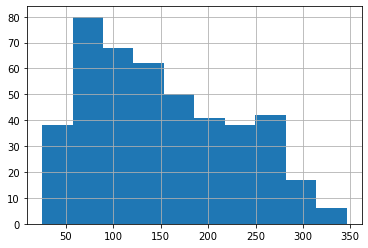

In [2]:
y.hist()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
 
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')
#Размерность обучающей выборки (296, 11)
#Размерность тестовой выборки (146, 11)
 
regr1 = DecisionTreeRegressor(max_depth=10, random_state=42)
regr1.fit(X_train, y_train)
##DecisionTreeRegressor(max_depth=10, random_state=42)
 
regr2 = RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
regr2.fit(X_train, y_train)
##RandomForestRegressor(max_depth=10, n_estimators=10, random_state=42)
 
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred2),2)}')

#вывод: Качество предсказания по MSE для решающего дерева 4.09
#Качество предсказания по MSE для случайного леса  1.84

Размерность обучающей выборки (296, 11)
Размерность тестовой выборки (146, 11)
Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса  1.84


⭐️ На примере случайного леса мы убедились, что качество базовой модели улучшают даже простейшие методы ансамблирования моделей, основанные на бутстрапе, такие как усреднение (Averaging) и голосование большинством (Majority Vote).

Давайте разберёмся, почему ансамблирование моделей улучшает качество. Дело в том, что идея ансамблирования основана на уменьшении разброса предсказаний модели.  

Доказано, что дисперсия ансамбля типа бэггинг (variance) в  раз меньше, чем смещение отдельной базовой модели.

**Доказательство**

Выберем из нашей выборки $X$ бутстрапом $K$ раз выборку длиной $N$. Получим выборки $X_{1}, X_{2}, ..., X_{K}$. Обучим базовые модели $a(x)$ на данных подвыборках. Первую модель $a_{1}(x) = a(x,X_{1})$ обучим на первой выборке бутстрапа, вторую $a_{2}(x) = a(x,X_{2})$ — на второй и так далее. Выполнив данную процедуру  раз, мы получим предсказание как усреднение по всем обученным на подвыборках моделях.

![](https://lms.skillfactory.ru/assets/courseware/v1/eeae6ae8e03e184ff94a533a020c1a73/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-58.png)

Теперь рассмотрим изменение смещения (bias) и разброса (variance) ансамблирования по отношению к базовым моделям.

> **Смещение** (bias) есть не что иное, как математическое ожидание разности между истинными ответами y и предсказаниями ансамбля: 

![](https://lms.skillfactory.ru/assets/courseware/v1/0010efcbd8914782f96e32442230250f/asset-v1:SkillFactory+DST-3.0
+28FEB2021+type@asset+block/dst-3-ml-8-51.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/c742c46100695e837ba46566856184cb/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-52.png)

Вывод: смещение ансамбля равно смещению базовой модели ансамбля!

Разброс (variance, обозначим далее как ) — это дисперсия ответов алгоритма:

![](https://lms.skillfactory.ru/assets/courseware/v1/3d239a00c5d9d71aec09651f109a150f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-53.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/c704097ba958bf98bb20e2aa7bbac971/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-54.png)
![](https://lms.skillfactory.ru/assets/courseware/v1/bc1b9ab29110bd4e40c3d2b1f947fbf1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-55.png)

При условии некоррелированности базовых моделей, которая достигается за счёт обучения на бустрапе, последнее слагаемое равно нулю. Итого:

![](https://lms.skillfactory.ru/assets/courseware/v1/1781bfac94b0757870c894169fbe2e0b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-56.png)

Тогда, зная, что модели не коррелированы, получаем:

![](https://lms.skillfactory.ru/assets/courseware/v1/7c8d37f4978d49117ffa159ebaf2c527/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-57.png)

**Вывод**: разброс ансамбля уменьшается в  раз по сравнению с разбросом базовой модели!

Эта методика ансамблирования применима не только к одинаковым моделям (например к решающим деревьям), но и к любым другим моделям. Главное — чтобы базовые модели были максимально нескоррелированы. Такую методику часто используют в соревновательном Data Science на различных хакатонах и Kaggle-контестах. 

⭐️ В этом юните мы разобрали и научились применять на практике методы, лежащие в основе ансамблирования в случайном лесу. О более сложных методах поговорим в следующих юнитах.

### Задание 2.6

Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. Предлагается используя код из модуля попытаться добиться неообучения для решающего дерева и случайного леса. Для этого:

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [4]:
regr3 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr3.fit(X_train, y_train)
 
regr4 = RandomForestRegressor(max_depth=2, n_estimators=10, random_state=42)
regr4.fit(X_train, y_train)
 
y_pred3 = regr3.predict(X_test)
y_pred4 = regr4.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred3),2)}')
print(f'Качество предсказания по MSE для случайного леса  {round(mean_squared_error(y_test, y_pred4),2)}')

Качество предсказания по MSE для решающего дерева 397.47
Качество предсказания по MSE для случайного леса  303.12


### Задание 2.7

Известно, что при большой глубине деревья склонны к переобучению. В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.

Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.

В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.

In [5]:
regr5 = DecisionTreeRegressor(max_depth=1000, random_state=42)
regr5.fit(X_train, y_train)
 
regr6 = RandomForestRegressor(max_depth=1000, n_estimators=10, random_state=42)
regr6.fit(X_train, y_train)
 
y_pred5 = regr5.predict(X_test)
y_pred6 = regr6.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred5),2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred6),2)}')

Качество предсказания по MSE для решающего дерева 4.06
Качество предсказания по MSE для случайного леса 1.84


# 3. Ансамблирование: блендинг и стекинг

> **Стекинг** (stacking) — алгоритм построения ансамбля, в котором параллельно и независимо друг от друга обучаются несколько базовых моделей (необязательно одной природы), а их предсказания используются для обучения **метамодели** (финальная модель) как факторы.

Предсказания базовых алгоритмов называются **метапризнаками**. 

### БЛЕНДИНГ

Простейшая реализация стекинга заключается в блендинге (blending). 

Схематично блендинг можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/e6928c858c286dde36c590f57d4d6b66/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-5.png)

Суть блендинга состоит в следующем: предположим у нас есть обучающая выборка $X$, которую мы делим пополам. Первая часть используется для обучения базовых моделей, а на второй базовые модели делают предсказания – **метапризнаки**, на которых уже и обучается в дальнейшем метамодель. 

**Недостатки блендинга** видны невооруженным глазом: ни базовые модели, ни метамодель не обучаются на полных данных. 

### СТЕКИНГ

Для решения этой проблемы используется усовершенствованная модель блендинга, которая имеет полноценное название — **стекинг**. Идея борьбы с недостатком блендинга — использование **кросс-валидации**.

Рассмотрим как обучается классический стекинг. Пусть у нас есть таблица с примерами X и ответами на них y. Количество признаков — $m$, количество наблюдений — $n$, количество моделей в стекинге — $K$.

1. Обучающая выборка разбивается на $L$ равных частей, называемых **фолдами**. Например, для трёх фолдов ($L=3$) схематично это будет выглядеть следующим образом:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/a8d9de09d8f6a07ac8b04d84fa837454/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_1.png)

2. Затем для каждой базовой модели эти фолды перебираются следующим образом: на каждом шаге фиксируются $L-1$ фолдов для обучения базовых моделей и один фолд для предсказания (в случае бинарной классификации каждая модель предсказывает вероятность принадлежности к классу 1, в случае мультиклассовой классификации — к каждому классу). В результате будет сформировано $L$ предсказаний, из которых формируется метапризнак $M_j$, где $j$ — номер модели:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/c3a923e9a53df27fe9098d747eda6f1f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_2.png)

    Такой подход к формированию метапризнаков позволяет избежать переобучения. Действительно, можно рассматривать $L-1$-фолд как обучающую выборку, а оставшийся — как тестовую. Таким образом, мы обучаемся на тренировочной выборке, но предсказания делаем для той выборки, которую ещё не видели.

3. После того как мы проделаем шаг 2 для всех базовых моделей, мы получим новый набор данных, состоящий из $K$ метапризнаков — предсказаний каждой из моделей. Предсказания моделей будут использоваться в качестве метапризнаков, на которых будет обучена метамодель.

    Пусть мы взяли три разных модели, т. е. $K=3$. Это будет выглядеть следующим образом:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/b7b2bde8db3159532ee0042b395858a6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_3.png)

**Примечание**. Кроме метафакторов, метамодель может использовать для своего обучения изначальные признаки из исходного набора данных.

Давайте посмотрим, как работает алгоритм на конкретной таблице. Пусть у нас есть некоторый набор данных из четырёх признаков, характеризующих клиента (x_0, x_1, x_2 и x_3), и восемь наблюдений. На основе этих признаков необходимо предсказать бинарный целевой признак (y) покупки товара со значениями 1 (купил) и 0 (не купил). Будем использовать стекинг, состоящий из трёх различных моделей.

Разбиваем выборку на четыре фолда, то есть в каждом фолде будет по две строки таблицы (обозначены цветом). Обучаем каждую модель на трёх из этих фолдов и делаем предсказание вероятности покупки для оставшегося.

Из предсказаний будет сформировано три метапризнака (по одному на каждую базовую модель). Это будут предсказанные базовыми классификаторами вероятности покупки (вероятность принадлежности к классу 1).

![](https://lms.skillfactory.ru/assets/courseware/v1/de1cba156b331d27e229eec3ec107819/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_4.png)

Формируем новый набор данных и отправляем его в метамодель, которая уже и делает финальное предсказание целевого признака покупки:

![](https://lms.skillfactory.ru/assets/courseware/v1/476d2d3365cad4c4b9cf2738ef982ca4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_5.png)

Метамодель будет производить поиск зависимостей в данных и принимать решение уже на основе предсказанных вероятностей покупки, которые были получены на первом этапе. 

В общем случае, когда у нас есть $K$ моделей, общая схема стекинга будет иметь вид:

![](https://lms.skillfactory.ru/assets/courseware/v1/bbe06be5289a83d9300f7d073f4ad468/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-8_6.png)

Важно понимать, стекинг — это чистая эвристика, эффективность которой доказана только практическим применением. Стекинг использует тот же подход, что и нейронные сети: предсказания предыдущего этапа (слоя) используются в качестве признаков для следующего этапа (слоя).

С точки зрения смещения и разброса, стекинг не имеет прямой математической интерпретации, так как не минимизирует напрямую ни ту, ни другую компоненту ошибки. Удачно работающий стекинг просто уменьшает ошибку, но гарантий уменьшения смещения или разброса нет.

Есть некоторые **рекомендации, как правильно строить стекинг**:

* В качестве метамоделей лучше всего применять простые модели: например, для задачи регрессии — линейную регрессию, а для задачи классификации — логистическую регрессию.
* В качестве базовых моделей лучшего всего использовать модели различной природы.

Из всех ансамблевых методов стекинг применяется реже всего. Главная причина: так как используется много разных моделей, необходимо подбирать их внешние параметры (коэффициенты регуляризации, глубина деревьев, число деревьев, темп обучения и т. д.) в совокупности, а подбор огромного количества параметров очень затратен по времени (мы убедились в этом в модуле по подбору внешних параметров моделей).

Вторая причина — в отличие от бэггинга и бустинга, для стекинга нет каких-то готовых решений, таких как случайный лес и градиентный бустинг над деревьями. Базовые модели нужно подбирать самому, а какие из них подойдут лучше всего — открытый вопрос.

Но, несмотря на эти недостатки, при грамотном подходе опытные специалисты выигрывают соревнования на Kaggle благодаря стекингу. Хотя зачастую таких участников называют «читерами» (от англ. cheat — «жульничать, обманывать»), ведь часто они собирают чуть ли не все возможные ML-модели в стекинг, запускают на мощном сервере подбор внешних параметров и комбинации из этих моделей в стекинге получают заветные 1.5 % прироста качества модели. На Kaggle даже существует фраза — «настекали».

В реальных условиях такой прирост значит мало, поэтому мы не будем концентрироваться на стекинге в нашем курсе, но пример разберём.

## СТЕКИНГ В SKLEARN

Стекинг для задачи регрессии имеет реализацию в библиотеке scikit-learn в классе StackingRegressor, для задачи классификации — в классе StackingClassifier. На вход подаётся список базовых моделей (атрибут estimators) и метамодель (атрибут final_estimator).

**Примечание**. Стоит понимать, что для задачи регрессии все базовые модели должны быть регрессорами, а для задачи классификации — классификаторами.  

Попробуем на практике применить стекинг, используя реализацию из библиотеки sklearn. В качестве входных данных будем использовать данные про диабет, использованные ранее. Обратимся снова к коду и обучим модель на данных.

Как и все ансамбли, модель стекинга находится в модуле ensemble.


In [6]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры StackingRegressor:

* estimators — список из кортежей базовых моделей в виде (str, model). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.
* final_estimator — метамодель.
* cv — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

Будем строить стекинг на следующих моделях:

* 'dt' — дерево решений;
* 'lr' — ридж-регрессия, линейная модель регрессии с L2-регуляризацией;
* случайный лес с количеством деревьев, равным 10, в качестве метамодели.

**Примечание**. В данном случае мы рассматриваем **RidgeCV**, которая представляет собой ридж-регрессию со встроенной кросс-валидацией по методу **Leave-One-Out Cross-Validation**. Подробнее читайте по [ссылке](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html).

Создадим список кортежей в формате ("наименование модели", модель) из этих моделей, и назовем его estimators:

In [7]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

Теперь, когда список из базовых моделей готов, создадим объект класса StackingRegressor. Первым аргументом передаём список из базовых моделей. Будем использовать в качестве метамодели модель случайного леса. Для этого передаём её в параметр final_estimator. Остальные параметры оставим по умолчанию.

Обучаем модель с помощью метода fit(), делаем предсказание классов с помощью метода predict(), а затем считаем метрики:

In [8]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [9]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')

Качество предсказания по MSE для стекинга 0.82


Посмотреть на метапризнаки можно с помощью метода **transform()**. Для этого в метод нужно передать матрицу наблюдений X. В результате вызова метода для всех объектов каждая из трёх моделей сделает предсказание вероятностей и вернёт матрицу из двух столбцов. Оформим её в виде DataFrame:

In [10]:
meta_data = reg.transform(X_train)
#Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,154.000000,154.0
1,192.000001,192.0
2,116.000002,116.0
3,81.000007,81.0
4,122.000005,122.0


↑ Наша таблица метапризнаков, на которой происходит обучение метамодели случайного леса. 

Примечание. При желании к метапризнакам можно добавить столбцы из изначального набора данных и попробовать обучить модель на этом наборе данных.

 ⬇️ Мы рассмотрели основные принципы работы стекинга и его реализацию в sklearn. Попробуйте применить стекинг для решения следующей задачи.

### Задание 3.5

Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.

Постройте стекинг из следующих базовых моделей:

* Ридж-регрессия (RidgeCV());
* Линейная регрессия.

В качестве метамодели используйте случайный лес с количеством деревьев 100, максимальной глубиной 10, все параметры для базовых моделей стандартные. Для всех алгоритмов параметр random_state=42.

Сделайте предсказание целевой метки для тестового набора данных. Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до двух знаков после запятой.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  LinearRegression())
]

In [13]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100,
                                          max_depth=10,
                                          random_state=42)
)
 
#Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()), ('dt', LinearRegression())],
                  final_estimator=RandomForestRegressor(max_depth=10,
                                                        random_state=42))

In [14]:
y_pred_stack = reg.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack),2)}')

Качество предсказания по MSE для стекинга 0.27


# 4. Ансамблирование: бустинг

→ Последней реализацией ансамблирования, которую мы рассмотрим, станет бустинг. Этот метод отличается от предыдущих своей структурой. 

> **Бустинг (boosting)** — это алгоритм построения ансамбля, основанный на последовательном построении слабых моделей, причём каждая новая модель пытается уменьшить ошибку предыдущей. После того как все модели обучены, они объединяются в композицию.

Примечание. Под слабыми моделями мы подразумеваем модели, точность которых немногим выше, чем случайное угадывание. Как правило, это короткие деревья решений, они обладают слабой предсказательной способностью.

Обратите внимание, что в бустинге базовые модели обучаются последовательно, а не параллельно, как в предыдущих методах, исправляя ошибки своего «предшественника»  и повышая качество всего ансамбля. 

Бустинг основан на вопросе, поднятом исследователями [М. Кернсом](https://en.wikipedia.org/wiki/Michael_Kearns_(computer_scientist)) и [Л. Вэлиантом](https://ru.wikipedia.org/wiki/%D0%92%D1%8D%D0%BB%D0%B8%D0%B0%D0%BD%D1%82,_%D0%9B%D0%B5%D1%81%D0%BB%D0%B8): «Может ли набор слабых обучающих алгоритмов создать сильный обучающий алгоритм?»

В отличие от бэггинга, бустинг обучается на одном и том же наборе данных, без генерации дополнительных выборок. Однако в процессе обучения меняются так называемые **веса наблюдений**. Если слабая модель допустила ошибку на каких-то примерах, то значимость (вес) этих примеров увеличивается и на них концентрируется следующая за ней модель.

Представить алгоритм бустинга можно следующей схемой:

![](https://lms.skillfactory.ru/assets/courseware/v1/f57e9e2fc278d940a8a1074e62b904f3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_1.png)

На схеме  представлено 11 разных наблюдений трёх различных классов (красные, зелёные и синие шарики). После того как модель делает предсказания, мы смотрим, на каких объектах мы угадали класс верно, а на каких ошиблись. Для тех объектов, на которых мы допустили ошибку, мы задаём больший вес. Вес наблюдения обозначается интенсивностью цвета. Чем больше вес наблюдения, тем ярче его цвет.

Так же как и бэггинг, бустинг предназначен для обучения моделей одного типа. То есть нельзя последовательно обучить 50 логистических регрессий, а затем 50 деревьев решения.

Каждая модель создаётся для того, чтобы найти ошибки предыдущей. Сами по себе они решают задачу плохо, но стоит объединить их усилия, и мы получим супермодель.

Очень наглядно будет выглядеть модель бустинга для логистической регрессии при обучении на двух признаках:

![](https://lms.skillfactory.ru/assets/courseware/v1/46bb0f960392c6a39fcf52d6da588054/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_2.png)

На рисунке изображено расположение двух линейно неразделимых классов. Нельзя провести одну такую плоскость, которая идеально решает задачу классификации. Раз нельзя одну, давайте проведём две.

Возьмём точки, для которых первая логистическая регрессия совершила ошибку. Увеличим вес этих точек (их значимость). Далее построим такую разделяющую плоскость, которая в первую очередь обращает внимание на наблюдения, имеющие наибольший вес.

Наконец, объединим две модели в одну — получим модель-композицию, которая идеально решает задачу классификации!

**Примечание**. Когда все модели из ансамбля обучены и составлена композиция из них, для того, чтобы совершить предсказание на новом объекте, необходимо «прогнать» характеристики объекта через все модели в той же последовательности, в которой они обучались, и объединить их результат.

Если бэггинг создавался с целью уменьшить разброс модели, то **цель бустинга** — уменьшить смещение модели.

Каждый следующий базовый алгоритм в бустинге обучается так, чтобы уменьшить общую ошибку всех своих предшественников. Как следствие, итоговая композиция будет иметь меньшее смещение, чем каждый отдельный базовый алгоритм (хотя уменьшение разброса также может происходить).

В предельном случае модель может обучиться так, что не будет допускать ошибок вовсе. Однако мы знаем, что это не всегда хорошо, ведь в таком случае модель может полностью подстроиться под обучающий набор данных и переобучиться.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых моделей часто выбирают **алгоритмы с высоким смещением и небольшим разбросом**, например короткие деревья решений. У каждого из таких деревьев слабая предсказательная способность, но если их объединить, мы получим очень мощную модель. 

В этом юните мы постараемся затронуть основные шаги эволюции бустинга от первой успешной модели до современных модификаций. Начнём рассмотрение с самой первой модели бустинга — **адаптивного бустинга**.

## АДАПТИВНЫЙ БУСТИНГ 

Первая реализация бустинга называлась AdaBoost. Это модель, которая подразумевает воплощение той самой идеи взвешивания объектов, которую мы рассмотрели выше. Алгоритм предполагает постоянную модификацию объектов выборки путём их взвешивания, причём веса обновляются специальным образом: каждая новая модель из ансамбля обучается на взвешенных данных и обращает большее внимание на ошибки своих предшественников.

Так как алгоритм является несовершенным и в дальнейшем получил свое развитие, мы не будем подробно останавливаться на его работе. Однако приведем краткое описание работы алгоритма на примере задачи **бинарной классификации**. 

Пусть у нас есть набор данных $X$, в котором $N$ объектов размерности $m$ (вектора в признаковом пространстве размера $M$) и метки класса $y \in  {-1,1}$, где -1 и 1 — метки отрицательного и положительного класса соответственно.

Будем строить ансамбль из  абстрактных базовых моделей — классификаторов. Обозначим их как  (это могут быть логистические регрессии/деревья решений или что-то ещё).  

1. Перед обучением базовой модели мы инициализируем веса объектов обучающей выборки следующим образом: $w_j = \frac{1}{N}, \, j=1,2,\dots,N$
2. Для всех $i$ от $1$ до $K$:

1. Обучить базовую модель $a_{i}(x)$ с учётом весов объектов $w_{j}$.

2. Вычислить ошибку классификатора $a_{i}(x)$, обозначим её за :



    Примечание. Здесь выражение $[y_{j} \neq a_{i}(x_{j})]$ — это знакомая нам по модулю классификации индикаторная функция. Она равна 1, если ответ $y_i$ не совпал с предсказанием базовой модели $a_{i}(x_{j})$, и 0 — в противном случае.

3. Тогда вес предсказаний данного классификатора (мера «вклада» предсказаний -ой модели в общий ансамбль) вычисляется по формуле: $n_{i} = \frac{1}{2}ln (\frac{1 - e_{i}}{e_{i}})$

    Формула веса становится нулевой только при **случайном угадывании**, то есть когда классификатор ошибается в половине меток — работает ровно так же, как и подбрасывание монетки. Однако остальные будут вносить вес в итоговую модель с положительным или отрицательным знаком (в этом легко убедиться, подставив вероятность ошибки, отличную от 0.5). Тем самым мы исключаем возможность вклада случайных классификаторов в результирующую модель.

4. Обновляем веса объектов в выборке. Для тех объектов, на которых мы допустили ошибку, вес увеличивается; для тех объектов, для которых наш ансамбль предсказал верный ответ — не изменяется. Формула обновления весов:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/8fd37ebf163d92d4f96f358e6b37a414/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-60.png)

    Видно, что если классификация была произведена верно для объекта $x_j$, то степень экспоненты будет равна 0, а значит множитель $e^{-n_{j}[y_{j}\neq a_{i}(x_{j}]}=1$ и вес $w_{j}$ не изменится. 

    Для того, чтобы привести все веса объектов к единому масштабу от 0 до 1, производится их нормировка путем деления каждого веса  на сумму всех весов:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/a5a60869b39154a53ff4da9ec785b530/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-ml-8-61.png)

5. После обучения каждой базовой модели предсказания ансамбля строятся как сумма из предсказаний базовых моделей, взятых с весом $\eta_{i}$:  
        
    $f(x) = sign (\sum_{i = 1}^{N} \eta_{i}a_{i}(x))$.

    **Примечание**. Функция $sign$ — функция взятия знака, принимает значение -1, если аргумент функции отрицательный, 0 — если аргумент функции нулевой, и 1 — если аргумент функции положительный.

    $sign(x) = \left\{\begin{matrix} 1,x > 0 \\ 0, x = 0 \\ -1, x < 0 \end{matrix}\right.$









**В чём плюсы такого алгоритма?**

✔️ Он прост. Обратите внимание: все математические операции — школьный курс математики, о высшей математике даже не идёт речи. Операции просты в реализации и не требуют вычисления производных, умножений матриц и прочих сложных математических конструкций.

✔️ Накладные расходы бустинга минимальны. Время построения определяется временем построения базовых моделей.

✔️ Показывает хорошую обобщающую способность.

✔️ Имеет возможность идентификации шумовых объектов.

**Но в чём минусы?**

⛔️ Жадное добавление алгоритмов приводит к неоптимальности композиции.

⛔️ Склонен к переобучению при наличии шума в данных.

⛔️ Алгоритм является эвристикой, и «взвешивание» объектов, на котором он основан, не подкреплено математическим обоснованием.

## АДАПТИВНЫЙ БУСТИНГ В SKLEARN

В sklearn адаптивный бустинг над решающими деревьями реализован в модуле sklearn.ensemble в виде классов [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html) и [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) для задач регрессии и классификации соответственно. Давайте проведём обучение на тех же данных, что и в предыдущих моделях ансамблирования — на данных о диабете. 

Прежде чем перейти к практической части, предлагаем ознакомиться с параметрами AdaBoost:

* base_estimator — параметр отвечает за природу базовых моделей, по умолчанию это DecisionTreeRegressor c максимальной глубиной (max_depth) 3.
* n_estimators — максимальное количество базовых моделей, по умолчанию равно 50. В случае идеального обучения алгоритм завершается ранее, чем данное значение.
* learning_rate — темп обучения, параметр, добавляющий дополнительный множитель весу базовой модели, по умолчанию он равен 1.
* loss{'linear', 'square', 'exponential'} — функция ошибки для обновления весов (в теоретической части мы рассматривали экспоненциальную форму обновления весов — 'exponential')
* random_state — параметр, фиксирующий случайные процессы в модели.

Для сравнимости результатов со случайным лесом возьмём количество базовых моделей, равное 10. Как говорилось ранее, глубина деревьев должна быть меньше, чем у случайного леса. По умолчанию она равна 3.  

In [15]:
from sklearn.ensemble import AdaBoostRegressor
dt = DecisionTreeRegressor(
    max_depth=3, 
    random_state=42
)

ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=10
)

ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Качество предсказания по MSE для AdaBoost 40.5

Качество предсказания по MSE для AdaBoost 40.5


### Задание 4.1

Измените количество базовых моделей до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Остальные параметры оставьте неизменными.

Качество модели по MSE для 50 базовых моделей:

In [16]:
ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=50
)

ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Качество предсказания по MSE для AdaBoost 40.5

Качество предсказания по MSE для AdaBoost 10.41


In [17]:
ada = AdaBoostRegressor(
    base_estimator=dt,
    random_state=42, 
    n_estimators=100
)

ada.fit(X_train, y_train)
 
 
ada_pred  = ada.predict(X_test)
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Качество предсказания по MSE для AdaBoost 40.5

Качество предсказания по MSE для AdaBoost 10.15


Основное отличие градиентного бустинга от адаптивного заключается в том, что градиентный бустинг строит композицию из своих базовых моделей, подбирая их оптимальным образом на основе принципа градиентных методов оптимизации. Такая модификация позволяет значительно ускорить процесс последовательного построения ансамбля в сравнении с реализации AdaBoost и добиться лучшего качества за счет меньшего количества моделей в ансамбле. 

## ГРАДИЕНТНЫЙ БУСТИНГ

> **Градиентный бустинг (Gradient Boosting, GB)** — это наиболее обобщённая версия бустинга, закреплённая математическим обоснованием. Впервые алгоритм был опубликован профессором статистики Стэнфордского университета Джеромом Фридманом. Алгоритм оказался очень эффективным и в дальнейшем был множество раз модифицирован — до Extreme Gradient Boosting ([XgBoost](https://xgboost.readthedocs.io/en/stable/)) и других модификаций, таких как [CatBoost](https://catboost.ai/) от Яндекса и [LightGMB](https://lightgbm.readthedocs.io/en/latest/) от Microsoft.

Сейчас градиентный бустинг и его модификации применяются практически везде. Любой запрос на Яндексе, выбор отеля на Booking или сериала на Netflix — всё это работает на градиентном бустинге. 

→ В этом модуле мы кратко рассмотрим принцип работы, а в модулях по математике разберём математическую формализацию алгоритма. 

В GB принцип классического бустинга сохраняется: каждый последующий алгоритм улучшает предыдущий, но, в отличие эвристического «взвешивания» наблюдений, градиентный бустинг использует информацию о функции потерь для построения нового алгоритма. 

Допустим, у нас есть некоторая функция потерь $L(y, \hat{y})$. Она зависит от двух аргументов: $y$ — истинный ответ, $\hat{y}=a(x)$ — прогноз модели $a(x)$. Причём неважно, какая это функция потерь (на самом деле ограничение есть — это дифференцируемость функции, то есть существование производной).

Для задачи регрессии это может быть, например, MSE:

$$L(y, \hat{y})=-\frac{1}{n} \sum_{i}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}$$

Для задачи классификации это может быть, например, logloss:

$$L(y, \hat{y})=-\sum_{i}^{n}\left(y_{i} \log \left(\hat{y}_{i}\right)+\left(1-y_{i}\right) \log \left(1-\hat{y}_{i}\right)\right)$$



Примечание. Для logloss $\hat{y}_i$ в данном контексте означает не предсказанный класс для -ого наблюдения, а вероятность принадлежности к классу 1 $i$-ого наблюдения, то есть на самом деле $y_i=P_i$. Чистая формальность для идентичности записей для регрессии и классификации.

Пусть мы построили какую-то модель, которая решает задачу классификации или регрессии. Обозначим её $a_1(x)$ — это какая-то функция, которая принимает на вход объекты  и выдаёт для них предсказания. Качество такой модели, скорее всего, будет не очень хорошим, ведь мы обучаем слабые модели.

Однако мы знаем, на каких объектах модель давала точные предсказания, а на каких — ошибалась. Нужно попробовать использовать эту информацию и обучить ещё одну модель $a_2(x)$.

Допустим, мы знаем, что предсказание первой модели на каком-то объекте  на 10 больше, чем в реальности. То есть $a_{1}(x_{i})=y_{i}+10$. То есть нам необходимо обучить следующую модель $a_2(x)$ таким образом, чтобы она предсказала для $x_i$ ответ -10, то есть $a_2(x_i)=-10$. Тогда предсказание идеально совпадает с действительностью:

$$a_{1}(x_{i})+a_{2}(x_{i})=y_{i}+10-10=y_{i}$$

→ Другими словами, следующая модель должна научиться предсказывать ошибки предыдущей.

В реальности вторая модель тоже не сможет обучиться идеально, поэтому обучим третью модель $a_3(x)$, которая будет «компенсировать» неточности первых двух. Будем продолжать так, пока не построим композицию из $K$ алгоритмов.

Финальная модель (обозначим её за $f(x)$), ищется в виде композиции из $K$ базовых алгоритмов определённого семейства (например, линейных моделей/деревьев):

$$f(x)=\sum_{k=1}^{K} a_{k}(x)=a_{1}(x)+a_{2}(x)+\ldots+a_{K}(x)$$

> Этот подход можно интуитивно представить как игру в гольф. Цель гольфиста — закатить мяч в лунку (для нас это значит с абсолютной точностью предсказать $y$). Гольфист делает свой первый удар, получает новую координату мяча $\hat{y}_1$ (у нас это ответы алгоритма $a_1(x)$). Следующий удар гольфист производит из положения: $\hat{y_{1}}=f_{1}(x)=a_{1}(x)$ и снова промахивается. Для нас это значит построить следующий алгоритм $a_2(x)$, который учится предсказывать ошибки предыдущего. После второго удара композиция — новое положение мяча будет равно:

$$f_{2}(x) = a_{1}(x) + a_{2}(x)$$

Гольфист делает следующий удар $a_3(x)$ из положения: $\hat{y_{2}}=a_{1}(x)+a_{2}(x)$. Новая координата мяча снова приближается к лунке и становится равной композиции:

$$f_{3}(x) = a_{1}(x) + a_{2}(x) + a_{3}(x)$$

А затем следует ещё один удар, и ещё один… И так, пока гольфист не попадёт в заветную лунку. А мы продолжаем обучать всё новые и новые модели $a_k(x)$, пока не сделаем идеального предсказания, двигаясь в сторону минимума функции потерь.

Финальная композиция, состоящая из K ударов будет равна: 

$$f(x)=\sum_{k=1}^{K}{a_k(x)}$$

![](https://lms.skillfactory.ru/assets/courseware/v1/569173e552ccd595bfd01348fbecfc4d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_3.png)



**Немного математического формализма ↓**

Пусть на какой-то момент было обучено $k$ алгоритмов, где $k<K$. Итоговая композиция будет иметь вид:

$$f_{k}(x) = a_{1}(x) + a_{2}(x) + ... + a_{k}(x)$$

Тогда следующее слагаемое, модель $a_{k+1}(x)$ (обозначим её для краткости $b_x$), должна строиться по принципу:

$$L(y, f_{k}(x) + b(x)) \rightarrow min_{b}$$

Знакомая запись, не правда ли? Она означает, что нам нужно найти такой алгоритм $b(x)=a_{k+1}(x)$, при котором наблюдается минимум функции потерь.

Чтобы построить эту модель $b(x)$, необходимо определить, что она будет пытаться предсказать.

Наша новая модель $b(x)$, по сути, должна предсказать вектор-столбец сдвигов (ошибок между истинными $y$ и предсказаниями модели). Посмотрим на задачу под другим углом: **нужно предсказать такой вектор, который двигает предсказания в сторону уменьшения функции ошибки**.

Тут на сцену и выходит градиент, а точнее — антиградиент. Пусть мы пока не знаем математических тонкостей, но мы знаем, что этот вектор направлен в сторону убывания функции. Его и будем предсказывать моделью $b(x)$.

Допустим, мы каким-то образом рассчитаем этот антиградиент на обучающей выборке $-\nabla_{f_{k}}L$ (для всех популярных функций потерь уже выведены формулы его расчёта). Это будет просто вектор-столбец из каких-то чисел. Мы умеем предсказывать числа, то есть будем решать задачу регрессии: будем с помощью модели $b(x)$ предсказывать координаты этого вектора антиградиента. Например, можно построить такую модель $b(x)$, чтобы средний квадрат ошибки между её ответами и антиградиентом (MSE) был минимален.

Когда мы построим модель $b(x)$, мы добавим её ответы в композицию, но не все сразу, а умножим ответы на коэффициент $\eta$ — темп обучения. Этот коэффициент влияет на то, какой вклад каждая следующая модель будет оказывать на общую композицию. То есть:

$$f_{k+1}(x) = f_{k}(x) + \eta b(x),$$

где $f_k(x)$ — ансамбль, построенный на $$k-ом этапе, $f_{k+1}(x)$ — новый ансамбль, который будет построен на следующем этапе $k+1$.

**Примечание**. Если принять, что предсказания $b(x)$ полностью совпадают с антиградиентом $b(x)=-\nabla_{a_{k}}L$, то получится формула градиентного спуска:

$$f_{k+1}(x) = f_{k}(x) - \eta \nabla_{f_{k}} L$$

Но градиентный спуск происходит не в пространстве параметров, а в пространстве ответов ансамбля $f_k$. Что это за пространство и как в нём считать градиенты, мы обсудим, когда будем разбирать градиентный бустинг подробнее.

Сейчас же для нас важно понимать, что каждая новая модель бустинга будет строиться так, чтобы двигать всю композицию вниз по функции потерь — в сторону вектора антиградиента.

**Зачем нужен параметр $\eta$?**

Он позволяет избежать переобучения и плавно приближаться к минимуму функции потерь.

Например, модель для какого-то $i$-ого наблюдения $b(x)$ предсказала, что ошибка (градиент) будет равна -5. Мы могли бы прибавить к полученным ранее ответам модели $f_k(x)$ эту 5:

$$f_{k}(x_{i}) + b(x_{i}) = f_{k}(x_{i}) - 5$$

Но так мы сразу сведём эту ошибку к 0 и подстроимся под обучающую выборку. Поэтому мы прибавляем не 5, а умножаем 5 на небольшое число , например на 0.1:

$$f_{k}(x_{i}) + \eta b(x_{i}) = f_{k}(x_{i}) - 0.5$$

Тогда мы будем плавно уменьшать ошибку с каждой новой моделью.

Если базовая модель — это дерево решений, то схематично это будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/2660d015a2887f762013ec1da2b87dcf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_4.png)

В качестве базовой модели можно использовать всё что угодно, но общепринятым является использование деревьев решений. Практика показывает, что это наилучший выбор, так как деревья решений очень просты в построении и из всех слабых моделей обладают наилучшей способностью описывать сложные зависимости.

> Бустинг, использующий в качестве базовой модели дерево решений, называется **градиентным бустингом над деревьями решений (Gradient Boosting on Decision Trees, GBDT)**. 

Схематично работу алгоритма GBDT можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/d041c24e7a23daa059f376cd82343aee/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_5.png)

Основным преимуществом такой схемы градиентного бустинга является эффективность в поиске нелинейных зависимостей в сравнении с любыми моделями, основанными на решающих деревьях. Это преимущество стало причиной доминирования GBDT на огромном спектре соревнований — от кредитного скоринга до рекомендательных систем.

В заключение введения в градиентный бустинг приведём некоторые **рекомендации по выбору внешних параметров алгоритма:**

* **Количество деревьев (n_estimators)**. Чем больше деревьев вы берёте, тем меньше ошибка на обучающем наборе данных, вплоть до 0, но, как вы понимаете, тем выше шанс переобучиться. Лучше начинать с небольшого количества моделей (50-100), а затем следить за ошибкой на тестовой выборке.
* **Темп обучения  (learning_rate)**. Чем выше темп обучения, тем больше вклад каждого следующего дерева будет в модель и тем быстрее вы сойдётесь к минимуму функции потерь и сведёте ошибку к 0. Однако снова высок риск переобучения. Рекомендуемые значения — от 0.01 до 1.
* **Максимальная глубина деревьев (max_depth)**. Градиентный бустинг лучше всего работает со слабыми моделями — это короткие деревья решений с глубиной от 1 до 8.

→ Все параметры влияют на обучение комплексно, поэтому их следует подбирать одновременно. О том, какие инструменты для этого существуют, мы поговорим в отдельном модуле.

Чтобы понять, как на градиентный бустинг влияют параметры темпа обучения, максимальной глубины деревьев и количества деревьев, предлагаем вам поиграть с настройками градиентного бустинга интерактивной демонстрации [Brilliantly wrong](http://arogozhnikov.github.io/2016/07/05/gradient_boosting_playground.html).

Вы можете регулировать следующие параметры:

* tree depth — максимальная глубина деревьев;
* learning rate — темп обучения;
* subsample — процент выборки, отведённый на обучение;
* trees — количество деревьев.

На демонстрации вы сможете увидеть, как меняется функция ошибки на тренировочной (train loss) и тестовой (test loss) выборках при изменении параметров, а также как меняется вид разделяющей поверхности.

Пример:

![](https://lms.skillfactory.ru/assets/courseware/v1/36bfee60556351f7853516eb7fd46201/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst3-ml3-7_6.png)

## ГРАДИЕНТНЫЙ БУСТИНГ В SKLEARN



[→ Скачайте ноутбук с кодом.](https://lms.skillfactory.ru/assets/courseware/v1/7699e6679ca8749f3e5bc78cc40fb40e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ML-8._Ensembles.ipynb) Это ноутбук из предыдущего юнита — если вы скачали его ранее, заново скачивать не нужно.

Как и все ансамбли, градиентный бустинг находится в модуле ensemble библиотеки sklearn. В качестве входных данных продолжим использовать данные о диабете.

Градиентный бустинг над деревьями для решения задачи регрессииреализован в классе [GradientBoostingRegressor](https:/scikit-learn.org/stable/modules/generated/sklearn.ensembleGradientBoostingRegressor.html). Для задачи классификации данныйметод реализован в классе [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html). Параметры уклассов схожи, различия только в функции потерь. Поэтому мы можемрассмотреть параметры GradientBoostingRegressor, подразумевая, чтоу классификатора они идентичны.

Основные параметры **GradientBoostingRegressor**:

* loss — функция потерь. По умолчанию в регрессии 'squared_loss' - наша любимая MSE, а в классификации 'deviance' - логистическая функция потерь (logloss).

* learning_rate — темп обучения. По умолчанию 0.1. 
* n_estimators — количество деревьев в бустинга (число  из бустинга). По умолчанию равно 100.
* max_depth — максимальная глубина одного дерева. По умолчанию равна 3 — строятся короткие деревья с большим смещением.
* min_samples_leaf — минимальное число объектов в листе. По умолчанию 1.
* random_state — число, отвечающее за генерацию случайных чисел.

✍️ Давайте построим модель градиентного бустинга над деревьями решений. Продолжим использовать данные о диабете:

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(
	max_depth=3, #максимальная глубина дерева
n_estimators=50, #количество деревьев
random_state=42 #генератор случайных чисел
)
gb.fit(X_train, y_train)
 
gb_pred  = gb.predict(X_test)
print(f'Качество предсказания по MSE для GradientBoosting {round(mean_squared_error(y_test, gb_pred),2)}')
 
# Качество предсказания по MSE для GradientBoosting 0.91

Качество предсказания по MSE для GradientBoosting 0.91


Как мы видим, при прочих равных градиентный бустинг даёт меньшую метрику по сравнению с адаптивным. Напомним, что из тестового задания по AdaBoost на 50 базовых моделях метрика MSE для адаптивного бустинга была равна 26.37. 

⬇️ Однако не стоит радоваться, так как в зависимости от качества данных, от различных параметров, например количества базовых моделей, картина может измениться в обратную сторону. Пример таких параметров представлен в задании ниже. 

## Задание 4.5

Измените количество базовых моделей до 10 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.

In [20]:
gb_10 = GradientBoostingRegressor(
	max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев
    random_state=42 #генератор случайных чисел
)
gb_10.fit(X_train, y_train)
 
gb_10_pred  = gb_10.predict(X_test)
print(f'Качество предсказания по MSE для GradientBoosting {round(mean_squared_error(y_test, gb_10_pred),2)}')
 
# Качество предсказания по MSE для GradientBoosting 0.91

Качество предсказания по MSE для GradientBoosting 702.75


In [21]:
gb_100 = GradientBoostingRegressor(
	max_depth=3, #максимальная глубина дерева
    n_estimators=100, #количество деревьев
    random_state=42 #генератор случайных чисел
)
gb_100.fit(X_train, y_train)
 
gb_100_pred  = gb_100.predict(X_test)
print(f'Качество предсказания по MSE для GradientBoosting {round(mean_squared_error(y_test, gb_100_pred),2)}')
 
# Качество предсказания по MSE для GradientBoosting 0.91

Качество предсказания по MSE для GradientBoosting 0.77


Полученное качество говорит о том, что с повышением количества базовых моделей наша модель сходится к решению быстрее прочих моделей. Однако высокая ошибка на маленьком количестве моделей говорит о том, что использования малого количества моделей может не хватить, чтобы модель действительно качественно обучалась, то есть повышение качества у градиентного бустинга происходит нелинейно.

✍️ Попробуем решить задачу **бинарной классификации** с помощью градиентного бустинга. Для этого возьмём [датасет качества вина](https://lms.skillfactory.ru/assets/courseware/v1/f739e63d4b354ed1bc7ea6b781bd8a38/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/winequality-red.zip). В качестве целевой метки будем считать качественным вино, рейтинг которого больше пяти.

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

Загрузим данные: 

In [23]:
df =pd.read_csv('data/winequality-red.csv', sep = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Как и договаривались ранее, хорошим вином будем считать все, имеющие значение признака quality больше 5:

In [24]:
X = df.drop(['quality'],axis = 1)
y = (df['quality'] >5).astype(int)

Разделим выборку на обучающую и тестовую:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
 
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')

# Размерность обучающей выборки (1071, 11)
# Размерность тестовой выборки (528, 11)

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)


Инициализируем модель градиентного бустинга:



In [26]:
gb = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

Обучим её на тренировочной выборке:



In [27]:
gb.fit(X_train, y_train)


c:\Users\Home\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


GradientBoostingClassifier(loss='deviance', random_state=42)

Посмотрим на метрики классификации с помощью classification_report():



In [28]:
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



Аналогично другим классификаторам в sklearn мы можем получать оценки вероятностей для каждого класса с помощью метода predict_proba(). Можете использовать эту возможность, например, для подбора оптимального порога вероятности, как мы делали это в предыдущих модулях.

In [29]:
gb.predict_proba(X_test)


array([[0.7575177 , 0.2424823 ],
       [0.81931477, 0.18068523],
       [0.80325657, 0.19674343],
       ...,
       [0.0212709 , 0.9787291 ],
       [0.90355559, 0.09644441],
       [0.80946194, 0.19053806]])

Известно, что с уменьшением темпа обучения (learning_rate) возникает необходимость повышения количества базовых моделей, то есть существует некоторая дилемма (trade-off) между темпом обучения и количеством моделей (n_estimators). Посмотрим на практике, как эти параметры связаны между собой. 

### Задание 4.6

Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_train, y_train) и запишите её в качестве ответа с точностью до двух знаков после запятой.

accuracy на тестовой выборке:

In [34]:
gb_task = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=200, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42, #генератор случайных чисел
    min_samples_leaf=10 #минимальное количество объектов в листе
)

gb_task.fit(X_train, y_train)

y_pred_task = gb_task.predict(X_test)

print(classification_report(y_test, y_pred_task))

c:\Users\Home\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.69      0.74      0.71       238
           1       0.77      0.73      0.75       290

    accuracy                           0.73       528
   macro avg       0.73      0.73      0.73       528
weighted avg       0.73      0.73      0.73       528



### Задание 4.7

Увеличьте количество деревьев до 500, остальные параметры оставьте прежними.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_train, y_train) и запишите её в качестве ответа с точностью до двух знаков после запятой.

accuracy на тестовой выборке:

In [35]:
gb_task = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.01, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42, #генератор случайных чисел
    min_samples_leaf=10 #минимальное количество объектов в листе
)

gb_task.fit(X_train, y_train)

y_pred_task = gb_task.predict(X_test)

print(classification_report(y_test, y_pred_task))

c:\Users\Home\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.72      0.75      0.73       238
           1       0.79      0.76      0.77       290

    accuracy                           0.75       528
   macro avg       0.75      0.75      0.75       528
weighted avg       0.76      0.75      0.75       528



### Задание 4.8

Увеличьте learning rate до 0.2.

Сделайте предсказание качества вина для тренировочного и тестового набора данных. Рассчитайте метрику accuracy для тестового набора (X_train, y_train) и запишите её в качестве ответа с точностью до двух знаков после запятой.

accuracy на тестовой выборке:

In [36]:
gb_task = GradientBoostingClassifier(
    loss='deviance', #функция потерь
    learning_rate=0.2, #темп обучения
    n_estimators=500, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42, #генератор случайных чисел
    min_samples_leaf=10 #минимальное количество объектов в листе
)

gb_task.fit(X_train, y_train)

y_pred_task = gb_task.predict(X_test)

print(classification_report(y_test, y_pred_task))

c:\Users\Home\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.78      0.76      0.77       238
           1       0.81      0.83      0.82       290

    accuracy                           0.80       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.80      0.80      0.80       528



⭐️ **Поздравляем!** Мы разобрали практически все ныне существующие методы ансамблирования — от самых простых, которые легли в основу случайного леса, до самых передовых (градиентных бустингов). Мы посмотрели на реализации в библиотеке sklearn, постарались разобрать методологию и основные параметры каждой модели. 

Основными рекомендациями по использованию ансамблей является использование случайных лесов и градиентных бустингов в первую очередь для классических задач классификации и регрессии с простыми табличными данными, так как подавляющее большинство соревнований в этой области было выиграно именно благодаря этим двум моделям. 

После данного модуля может сложиться впечатление, что ансамблирование — всегда лучший вариант для финальной модели, однако часто в задачах требуется **интерпретируемость** результатов, которой не могу похвастаться бустинг и стекинг. 

Кроме того, использование случайного леса на данных с большим количеством выбросов может привести к тому, что модель будет обучается на данных, у которых дисперсия в разы больше, чем у исходных, так как подвыборка для обучения выбирается случайно. Таким образом, мы не сможем получить выигрыш в дисперсии, который нам даёт ансамблирование. 

В заключение приведём таблицу преимуществ и недостатков методов ансамблирования:

Метод|✔️ Плюсы|⛔ Минусы
-|-|-
Бэггинг|Хорошо параллелится вычисление (модели обучаются параллельно). Снижает дисперсию.|Предполагается использование одинаковых моделей. Необходимо использование глубоких деревьев. Плохо интерпретируемая.
Стекинг|Хорошо параллелится (модели обучаются параллельно).Хорош для использования различных по природе базовых моделей|Качество сильно зависит от качества базовых моделей. Плохо интерпретируемая.
Бустинг|Модели обучаются последовательно, уточняя друг друга. Снижает смещение. Базовые модели — неглубокие деревья.|Плохо параллелится вычисление. Плохо интерпретируемая

# 5. Пайплайны

→ Поговорим о пайплайнах: чем они хороши, для чего применяются и как на практике реализовать свой пайплайн. 

> Как говорилось ранее, **пайплайн** — это автоматизированный поэтапный процесс выполнения манипуляций с данными, включающий в себя сбор, обработку, генерацию и отбор признаков, обучение модели с последующей её настройкой и проверкой качества. 

Основные цели использования пайплайнов — автоматизация, ускорение вычислений с использованием многопоточности в Python и дальнейшее развертывание пайплайна для использования в периодических расчетах (сбор данных в режиме онлайн/онлайн-работа модели). Кроме того, пайплайны хороши в случае, когда надо подобрать оптимальные гиперпараметры для всего цикла обработки данных и последующего обучения. 

В библиотеке scikit-learn пайплайны реализованы как класс **sklearn.pipeline.Pipeline()**. Этот класс может быть использован для сбора воедино отбора и обработки данных вместе с итоговой моделью. 

Важной особенностью применения пайплайна в реализации scikit-learn является обязательное наличие у каждого метода внутренних преобразований **transform()**, а для финальной модели — метод **fit()**. 

Давайте рассмотрим создание пайплайна на конкретном примере: 



Возьмём для примера [датасет недвижимости в Калифорнии](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing), в котором решается задача регрессии (определение цены недвижимости).

[→ Скачайте ноутбук с кодом](https://lms.skillfactory.ru/assets/courseware/v1/1b2c5eeeb6d41d55e982b54244f28b1c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/ML-8._Pipelines.ipynb)

**California Housing Dataset**

* MedInc — медианный уровень дохода в квартале;
* HouseAge — медианный возраст дома в квартале;
* AveRooms — среднее количество помещений;
* AveBedrms — среднее количество спальных комнат;
* Population — население квартала;
* AveOccup — средний срок проживания;
* Latitude — значение широты квартала;
* Longitude — значение долготы квартала;
* Price — целевое значение.

Загрузим датасет и посмотрим на него:

In [37]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
 
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.loc[:,'target'] = data['target']
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Определимся с метрикой, по которой будем оценивать качество модели — **Root Mean Squared Error (RMSE)**, корень из среднего квадрата отклонения. Для этого на метод mean_squared_error подадим атрибут squared = False, который позволяет управлять возведением метрики в квадрат. Помимо RMSE для оценки качества модели будем использовать метрику **R2.**

In [39]:
def rmse(y_hat, y):
    return mean_squared_error(y_hat, y, squared = False)

Посмотрим на типы данных с помощью метода df.info().



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Видим, что данные исключительно типа float, поэтому мы можем в качестве предобработки применить к ним **StandardScaler()**.

Разделим данные на обучающую и тестовую выборки, используя **train_test_split**: 

In [41]:
X = df.drop('target', axis=1)
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
print(f'Размер обучающей выборки {X_train.shape}')
print(f'Размер тестовой выборки {X_test.shape}')

# Размер обучающей выборки (15480, 8)
# Размер тестовой выборки (5160, 8)

Размер обучающей выборки (15480, 8)
Размер тестовой выборки (5160, 8)


Обучим простейший пайплайн, вызвав метод **fit()**, состоящий из случайного леса и стандартизации (**StandardScaler**). На вход пайплайна подается список из преобразований в формате кортежа (название метода преобразования, по которому мы будем обращаться в дальнейшем к нашему преобразованию, объект  метода преобразования). Например:

In [42]:
pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipeline.fit(X_train, y_train)

# Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

Посмотрим на метрики. Для этого сделаем предсказание пайплайном с помощью метода **predict(**) и посчитаем R2 и RMSE с помощью функций **r2_score()** и **rmse()** соответственно. Округлим результат до четырёх цифр после запятой.

In [43]:
y_pred = pipeline.predict(X_test)
print(f'Качество по метрике R2: { round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')

# Качество по метрике R2: 0.808
# Качество по RMSE: 0.5041

Качество по метрике R2: 0.8063
Качество по RSME: 0.5062


Теперь мы можем посмотреть на все параметры в пайплайне, вызвав метод ```get_params()```:

In [44]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 1.0,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

**Примечание**. В качестве альтернативного метода задания пайплайна можно использовать метод **make_pipeline**, на вход которого подаются объекты, которые будут использованы в пайплайне. В нашем случае:

In [45]:
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), RandomForestRegressor())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

Использование пайплайна в виде, полученном из ```make_pipeline```, аналогично. 

Попробуем теперь обратиться к отдельной части пайплайна. Попробуем вызвать значение **n_estimator** у случайного леса. Мы можем это сделать двумя способами: индексацией пайплайна или обращением через имя, которые мы задали ранее при создании ('rf').

In [46]:
print(pipeline[1].n_estimators)
print(pipeline['rf'].n_estimators)

# 100
# 100

100
100


Теперь попробуем задать этому же параметру значение 200. Можно это сделать, используя метод **set_params()**, на вход которого надо подавать конструкцию **<название модуля>__<название параметра>**. 

Обратите внимание на **два нижних подчеркивания**, которые используются в качестве литералов для разбиения названия модуля и названия его параметра. Без него компилятор будет неправильно интерпретировать параметр, который вы хотите изменить!

In [47]:
pipeline.set_params(rf__n_estimators=200)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=200))])

Данную структуру надо учитывать, когда для пайплайна задается GridSearch кросс-валидация. Попробуем взять 100, 200, 500 базовых моделей и сделать поиск оптимального параметра StardardScaler with_mean (типа bool, который отвечает за центровку данных, приводит распределение к нулевому среднему, по умолчанию — True. В противном случае среднее данных остается неизменным):

In [48]:
from sklearn.model_selection import GridSearchCV
param_grid = {'scaler__with_mean':[True,False],
              'rf__n_estimators':[100, 200, 500]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose = True)


grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=500))])


In [49]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Качество по метрике R2: { round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RSME: {round(rmse(y_test, y_pred),4)}')
 
# Качество по метрике R2: 0.81
# Качество по RSME: 0.5013

Качество по метрике R2: 0.8097
Качество по RSME: 0.5019


Как видим, качество улучшилось по обеим метрикам.



При использовании пайплайна для сборки обработки данных в один стек удобно воспользоваться Column Tranformer. Мы разберём его устройство на примере датасета [рейтинга красного вина](https://lms.skillfactory.ru/assets/courseware/v1/4ac05d2d2721ace4a495c186925a350b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/Red.zip). 

Для начала загрузим данные и посмотрим на них:



In [51]:
df_wine= pd.read_csv('data/Red.csv')
df_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [52]:
df_wine.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


Например, у нас есть численный признак цена вина (Price) и категориальный регион производства (Region). Для первого надо применить **StandardScaler()**, для второго — **OneHotEncoder()**. Мы можем сделать это следующим образом:

In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']))
print(ct)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['Price']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Country'])])


**Примечание**. Если мы хотим применить, например, OneHotEncoder, к более чем одному признаку, то просто достаточно добавить в список колонки, например ```['Country', ‘Region’]```. Теперь OneHotEncoder будет работать не только на признаке Country, но ещё и на Region.

**Примечание**. Можно также использовать фильтрацию по типу колонок, используя метод **make_column_selector()** из sklearn.compose:

```py
ct = ColumnTransformer([
       ('scale', StandardScaler(),
       make_column_selector(dtype_include=np.number)),
       ('onehot',
       OneHotEncoder(),
       make_column_selector(dtype_include=object))])
```

Полученный трансформер можно использовать в качестве элемента пайплайна, например: 

In [55]:
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor())])


Давайте посмотрим на результат работы ColumnTransformer в пайплайне. Для этого обучим его на колонках Price и Country, а в качестве целевой метки используем рейтинг вина Rating.

In [56]:
X = df_wine[['Country', 'Price']]
y = df_wine['Rating']
pipeline.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])

Важный момент: при отображении после преобразования ваш датасет будет представлен в виде **sparse-матрицы** (специальный формат для хранения больших, практически полностью нулевых матриц), поэтому надо будет вызвать метод **toarray()**. Так же мы можем получить названия колонок с onehotencoder с помощью метода **.get_feature_names_out()**, обратившись именно к энкодеру. 

In [57]:
pd.DataFrame(pipeline['ct'].transform(X).toarray(), columns = ['Price']+ pipeline['ct'].transformers_[1][1].get_feature_names_out().tolist())

,Price,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_China,Country_Croatia,...,Country_Portugal,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United States,Country_Uruguay
0,0.657648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.278402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.373184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.358231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117684,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,-0.266981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8662,-0.224358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8663,-0.178910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8664,-0.387784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


⭐️ Итак, мы научились использовать и собирать полноценный пайплайн, узнали о трансформациях колонок, которые позволяют легко и просто делать рутинные задачи типа нормализации/стандартизации и кодирования категориальных признаков. 

Обученный пайплайн можно сохранить в формат pickle, например, используя библиотеку joblib. Далее его можно использовать после десериализации как решение «из коробки», применяя следующие методы.

**Примечание**. Формат pickle реализует двоичный протокол для сериализации/десериализации объектов для сохранения и последующего использования без каких-либо дополнительных преобразований. Удобен для переноса обученных моделей, предобработки и так далее.

> **Сериализация** — процесс перевода структуры данных в последовательность битов. 

> **Десериализация** — процесс создания из последовательности битов  структуры данных.

In [59]:
# !pip install joblib
import joblib
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

После этого ваш пайплайн будет сохранен в файл pipeline.pkl. Вы можете использовать свой пайплайн, импортировав все библиотеки из зависимостей (которые импортировались при создании пайплайна), используя следующие строчки кода:

In [60]:
pipeline_loaded = joblib.load('pipeline.pkl')
print(pipeline_loaded)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])


Таким образом, мы можем использовать уже готовый пайплайн, например для проведения онлайн расчётов и постановки модели на постоянный регулярный расчёт. Под онлайн-расчётами мы подразумеваем сбор данных в формате онлайн и получения результатов модели в онлайне с помощью фреймворка, например [AirFlow](https://airflow.apache.org/). Это необходимо для раскатки решения, например, на сайте (модель рекомендаций фильмов, схожие товары в интернет магазинах и так далее).

# 6. Пайплайны. Практика

После изучения основ предлагаем сделать свой пайплайн самостоятельно. Попробуем на практике реализовать пайплайн, добавить в него преобразования, изменить параметры. Приступим!

### Задание 6.1

Предлагаем использовать датасет, с которым вы работали при создании пайплайна (файл Red.csv ).

Вам следует выполнить следующее:

* Добавить обработку столбца 'Region' в пайплайн, полученный ранее в модуле, с использованием OrdinalEncoder.  
    **Важно**! Для совпадения результатов процесс трансформации столбцов должен выполняться в следующей последовательности:
    1. Кодирование столбца 'Region'.
    2. Стандартизация столбца 'Price'.
    3. Кодирование столбца 'Country'.  
    .

* Обучить на тренировочном наборе данных пайплайн и оценить качество модели по метрике RMSE на тестовом наборе (файл Red_test.csv ).
* Зафиксировать random_state=42.
* Сохранить пайплайн в файл pipeline_wine.pkl.

    В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [240]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (OrdinalEncoder(), ['Region']),
    (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']))


pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor(random_state=42))])

data = pd.read_csv('data/Red.csv')
test = pd.read_csv('data/Red_test.csv')

X_train = data[['Country', 'Region', 'Price']]
y_train = data['Rating']

X_test = test[['Country', 'Region', 'Price']]
y_test = test['Rating']

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f'Качество по RMSE: {round(rmse(y_test, y_pred),4)}')

joblib.dump(pipeline, 'pipeline_vine.pkl')

Качество по RMSE: 0.0765


['pipeline_vine.pkl']

### Задание 6.2

Теперь попробуем изменить параметры случайного леса в пайплайне, полученном в предыдущем задании.

Измените параметр n_estimators в случайном лесу со значения по умолчанию до 200 , используя метод set_params.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округленный до четвёртого знака после запятой.

In [242]:
pipeline.set_params(rf__n_estimators=200)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f'Качество по RMSE: {round(rmse(y_test, y_pred),4)}')

Качество по RMSE: 0.0761


### Задание 6.3

Теперь попробуем добавить стекинг в качестве модели в пайплайн.

Вам следует выполнить следующее:

* Собрать StackingRegressor:
    1. В качестве базовых моделей возьмите ридж-регрессию RidgeCV() и решающее дерево.
    2. В качестве метамодели возьмите случайный лес с настройками (количество базовых моделей 10).
    3. Все базовые модели стекинга модели должны быть с настройками по умолчанию (кроме random_state).
* Зафиксировать random_state=42 (для всех моделей).
* Заменить в пайплайне задачи 6.1 случайный лес на StackingRegressor.
* Обучить модель на тренировочной выборке.

В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округлённый до второго знака после запятой.

In [244]:
#Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=[('lr', RidgeCV()), ('dt', DecisionTreeRegressor(random_state=42))],
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)

pipeline = Pipeline([('ct', ct), ('sr', reg)])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(f'Качество по RMSE: {round(rmse(y_test, y_pred),2)}')

Качество по RMSE: 0.18
